In [1]:
import os

os.chdir("../..")

In [2]:

from datetime import datetime, timezone
from typing import Dict, List, Literal, cast
import os 
from langchain_core.messages import HumanMessage, AIMessage, BaseMessage, SystemMessage
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_openai import ChatOpenAI as LangchainChatOpenAI
from langchain_core.messages import AIMessage
from langchain_core.runnables import RunnableConfig
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from pydantic import BaseModel, Field
from typing import Any, List, Optional, Union
from typing_extensions import Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph import add_messages
from dataclasses import dataclass, field
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_openai import ChatOpenAI as LangchainChatDeepSeek
from langchain_core.prompts import MessagesPlaceholder
from langchain.schema import HumanMessage, SystemMessage, AIMessage  # Import AIMessage for assistant responses
from langgraph.checkpoint.memory import MemorySaver
import logging
from app.react_agent.agents import *
from app.react_agent.tools import *
from app.react_agent.prompts import *
from app.react_agent.state import *
from app.react_agent.graph import graph

from langchain.agents import AgentExecutor
from langgraph.prebuilt import create_react_agent
from langchain.tools import BaseTool, Tool
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles
from langgraph.prebuilt import tools_condition
from dotenv import load_dotenv
from datetime import date
import logging
import warnings
# import shutil
import uuid

from app.react_agent.tools import (team_tools, player_tools,
                                   game_data_tools, game_info_tools)

from app.react_agent.prompts import (TEAM_PROMPT, PLAYER_PROMPT, GAME_INFO_PROMPT, GAME_DATA_PROMPT, 
                                     MAIN_SUPERVISOR_PROMPT, GAME_SUPERVISOR_PROMPT)

# Suppress debug messages from ipywidgets
logging.getLogger('ipywidgets').setLevel(logging.WARNING)
logging.getLogger('comm').setLevel(logging.WARNING)
logging.getLogger('tornado').setLevel(logging.WARNING)
logging.getLogger('traitlets').setLevel(logging.WARNING)
logging.disable(logging.CRITICAL)
logging.basicConfig(level=logging.CRITICAL, handlers=[logging.NullHandler()])
warnings.filterwarnings("ignore")

load_dotenv()

DEBUG:httpx:load_ssl_context verify=True cert=None trust_env=True http2=False
DEBUG:httpx:load_verify_locations cafile='C:\\Users\\pault\\anaconda3\\envs\\app_project\\Library\\ssl\\cacert.pem'
DEBUG:httpx:load_ssl_context verify=True cert=None trust_env=True http2=False
DEBUG:httpx:load_verify_locations cafile='C:\\Users\\pault\\anaconda3\\envs\\app_project\\Library\\ssl\\cacert.pem'
DEBUG:httpx:load_ssl_context verify=True cert=None trust_env=True http2=False
DEBUG:httpx:load_verify_locations cafile='C:\\Users\\pault\\anaconda3\\envs\\app_project\\Library\\ssl\\cacert.pem'
DEBUG:httpx:load_ssl_context verify=True cert=None trust_env=True http2=False
DEBUG:httpx:load_verify_locations cafile='C:\\Users\\pault\\anaconda3\\envs\\app_project\\Library\\ssl\\cacert.pem'


True

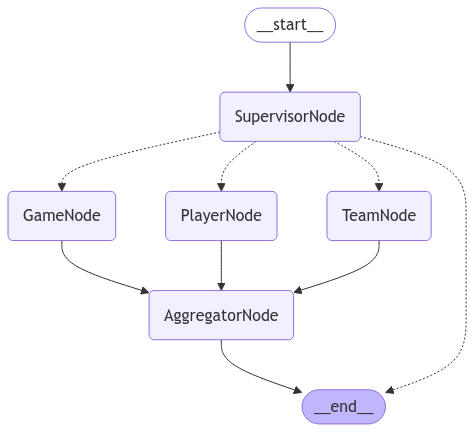

In [3]:
display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)


In [4]:

# user_input = """Summarise the rule Rule 5.01 to 5.02(c) of the MLB official Baseball rules? Also, explain Appendix 5 of the rule book.
#             """

# user_input = "tell me about the games played by the Minnesota Twins in the last 5 days. today is Jan 30 2025"

user_input = "Who are the highest scoring players in the last 5 games of the Minnesota Twins?"
# user_input = "what do you know about Jorge Alcala last performance, and how did he perform in the last game?"   
input_state = {"messages": [HumanMessage(content=user_input)]}

thread_id = str(uuid.uuid4())
config = {
    "configurable": {
        "thread_id": thread_id,  # Ensure this is correctly set
        "checkpoint_ns": "some_namespace",  # Add a valid namespace
        "checkpoint_id": str(uuid.uuid4()),  # Generate a unique checkpoint ID
        "recursion_limit": 3000 
    }
}

# **Graph Invocation**
output = graph.invoke(input_state, {"recursion_limit": 30} )      

ValueError: Single '}' encountered in format string

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import SystemMessage
from langchain.tools import Tool
from langchain_openai import ChatOpenAI
from langchain_community.tools import TavilySearchResults

# from langchain.agents import create_react_agent, AgentExecutor
from langgraph.prebuilt import create_react_agent
from langchain_core.messages import AIMessage, HumanMessage

team_tools = [mlb_get_team_id_tool, mlb_get_team_roster_tool, mlb_get_team_info_tool]




# Initialize the language model
llm = ChatOpenAI(model="gpt-4o", temperature=0)

# Partial the prompt with tools and tool names
prompt = revised_team_prompt.partial(
    tools="\n".join([f"- {tool.name}: {tool.description}" for tool in team_tools]),
    tool_names=", ".join([tool.name for tool in team_tools])
)

# Create the React agent
agent = create_react_agent(
    model=llm, 
    tools=team_tools, 
    prompt=prompt
)

# graph = StateGraph()
# graph.add_node("agent_node", agent)

query = "Tell me about the performance of Pittsburgh Pirates in the 2024 season" 

messages = agent.invoke({"messages": [("human", query)]})
print(
    {
        "input": query,
        "output": messages["messages"][-1].content,
    }
)



{'input': 'Tell me about the performance of Pittsburgh Pirates in the 2024 season', 'output': 'The Pittsburgh Pirates are a Major League Baseball team that plays in the National League Central Division. Here is some detailed information about the team for the 2024 season:\n\n- **Team Name**: Pittsburgh Pirates\n- **Abbreviation**: PIT\n- **Location**: Pittsburgh\n- **Venue**: PNC Park\n- **League**: National League\n- **Division**: National League Central\n- **First Year of Play**: 1882\n- **Spring League**: Grapefruit League\n\nUnfortunately, the tool used does not provide specific performance metrics such as win-loss records or standings for the 2024 season. For detailed performance statistics, you might need to refer to sports news websites or databases that track MLB season performances.\n\nIf you have any other questions or need further assistance, feel free to ask!'}


> Set this 

In [39]:
import os

os.getcwd()

'c:\\Users\\pault\\Documents\\3. AI and Machine Learning\\2. Deep Learning\\1c. App\\Projects\\Sports_AI\\app\\react_agent'

> MLB

In [ ]:
from langchain_openai import ChatOpenAI
from langgraph_supervisor import create_supervisor
from langgraph.prebuilt import create_react_agent
from app.react_agent.tools import team_tools, player_tools, game_info_tools, game_data_tools
from app.react_agent.prompts import TEAM_PROMPT, PLAYER_PROMPT, GAME_INFO_PROMPT, GAME_DATA_PROMPT, MAIN_SUPERVISOR_PROMPT, GAME_SUPERVISOR_PROMPT
from langgraph.graph import StateGraph, START, END

llm = ChatOpenAI(model="gpt-4o")

team_agent = create_react_agent(
    model=llm,
    tools=team_tools,
    name="team_agent",
    prompt= TEAM_PROMPT
)

player_agent = create_react_agent(
    model=llm,
    tools=player_tools,
    name="player_agent",
    prompt=PLAYER_PROMPT
)

game_info_agent = create_react_agent(
    model=llm,
    tools=game_info_tools,
    name="game_info_agent",
    prompt=GAME_INFO_PROMPT
)

game_data_agent = create_react_agent(
    model=llm,
    tools=game_data_tools,
    name="game_data_agent",
    prompt=GAME_DATA_PROMPT
)


# Create supervisor workflow
mlb_workflow = create_supervisor(
    [team_agent, player_agent, game_data_agent, game_info_agent],
    model=llm,
    prompt=MAIN_SUPERVISOR_PROMPT
)

# Compile and run
app = mlb_workflow.compile()

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)


In [7]:
result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "Tell me about the performance of Pittsburgh Pirates in the 2024 season"
        }
    ]
})


In [8]:
result

{'messages': [HumanMessage(content='Tell me about the performance of Pittsburgh Pirates in the 2024 season', additional_kwargs={}, response_metadata={}, id='d936d498-e83c-42ec-a17b-229e16e4565a'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_0c6liMs1OfrCB0m9RCFrSuVQ', 'function': {'arguments': '{}', 'name': 'transfer_to_team_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 494, 'total_tokens': 507, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'tool_calls', 'logprobs': None}, name='supervisor', id='run-c10e3b0d-e574-4951-b9e2-9276ed85d650-0', tool_calls=[{'name': 'transfer_to_team_agent', 'args': {}, 'id': 'call_0c6liMs1OfrCB0m9RCFrSuVQ',

> NBA

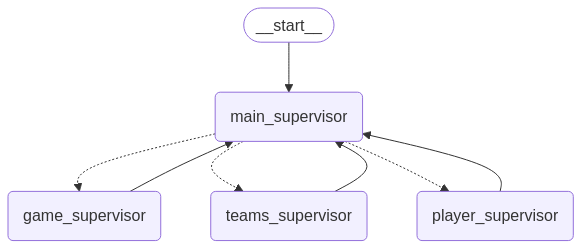

In [ ]:
from langchain_openai import ChatOpenAI
from langgraph_supervisor import create_supervisor
from langgraph.prebuilt import create_react_agent
from app.react_agent.tools import team_tools, player_tools, game_info_tools, game_data_tools
from app.react_agent.prompts import TEAM_PROMPT, PLAYER_PROMPT, GAME_INFO_PROMPT, GAME_DATA_PROMPT, MAIN_SUPERVISOR_PROMPT, GAME_SUPERVISOR_PROMPT
from app.react_agent.prompts import *
from app.react_agent.tools import *
from langgraph.graph import StateGraph, START, END

llm = ChatOpenAI(model="gpt-4o")


# -------------------------------- GAMES--------------------------------
live_game_agent = create_react_agent(
    model=llm,
    tools=[nba_live_scoreboard, nba_live_boxscore , nba_live_play_by_play],
    name="live_game_agent",
    prompt= LIVE_GAME_PROMPT
)

game_scheduling_agent = create_react_agent(
    model=llm,
    tools=[nba_list_todays_games, nba_live_scoreboard, tavily_search_tool],
    name="game_scheduling_agent",
    prompt=GAME_SCHEDULING_PROMPT
)

team_game_logs_agent = create_react_agent(
    model=llm,
    tools=[nba_team_game_logs, nba_team_game_logs_by_name, nba_fetch_game_results], # add nba_fetch_game_results
    name="team_game_logs_agent",
    prompt=TEAM_GAME_LOGS_PROMPT
)

game_online_agent = create_react_agent(
    model=llm,
    tools=[tavily_search_tool],
    name="game_online_agent",
    prompt=GAME_ONLINE_PROMPT
)

# Create supervisor for games
game_supervisor = create_supervisor(
    [live_game_agent, game_scheduling_agent, team_game_logs_agent, game_online_agent],
    supervisor_name = "game_supervisor",
    model=llm,
    prompt=GAME_SUPERVISOR_PROMPT
).compile(name = "game_supervisor")


# -------------------------------- PLAYERS--------------------------------

player_info_agent = create_react_agent(
    model=llm,
    tools=[nba_search_players, nba_common_player_info, nba_list_active_players],
    name="player_info_agent",
    prompt= PLAYER_INFO_PROMPT
)

player_stats_agent = create_react_agent(
    model=llm,
    tools=[nba_search_players, nba_player_career_stats, nba_player_game_logs],
    name="player_stats_agent",
    prompt=PLAYER_STATS_PROMPT
)

player_online_agent = create_react_agent(
    model=llm,
    tools=[tavily_search_tool],
    name="player_online_agent",
    prompt=PLAYER_ONLINE_PROMPT
)

# Create supervisor for games
player_supervisor = create_supervisor(
    [player_info_agent, player_stats_agent, player_online_agent],
    supervisor_name = "player_supervisor",
    model=llm,
    prompt=PLAYER_SUPERVISOR_PROMPT
).compile(name = "player_supervisor")


# -------------------------------- TEAMS --------------------------------


team_game_logs_agent = create_react_agent(
    model=llm,
    tools=[nba_team_game_logs, nba_team_game_logs_by_name, nba_fetch_game_results], # add nba_fetch_game_results
    name="team_game_logs_agent",
    prompt=TEAM_GAME_LOGS_PROMPT
)

team_stats_agent = create_react_agent(
    model=llm,
    tools=[nba_team_standings, nba_team_stats_by_name, nba_all_teams_stats],
    name="team_stats_agent",
    prompt=TEAM_STATS_PROMPT
)

team_online_agent = create_react_agent(
    model=llm,
    tools=[tavily_search_tool],
    name="team_online_agent",
    prompt=TEAM_ONLINE_PROMPT
)

# Create supervisor for games
teams_supervisor = create_supervisor(
    [team_game_logs_agent, team_online_agent, team_stats_agent],
    supervisor_name = "teams_supervisor",
    model=llm,
    prompt=TEAM_SUPERVISOR_PROMPT
).compile(name = "teams_supervisor")



# -------------------------------- MAIN SUPERVISOR --------------------------------
main_supervisor = create_supervisor(
    [game_supervisor, player_supervisor, teams_supervisor],
    supervisor_name = "main_supervisor",
    # output_mode = "last_message",
    model=llm,
    prompt=NBA_SUPERVISOR_PROMPT
).compile(name = "main_supervisor")

display(
    Image(
        main_supervisor.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)


In [12]:
input_text = "If LA Lakers made it to the playoffs right now, who would be their top scorer, and who are they likely to play with?"


result = main_supervisor.invoke({
    "messages": [
        {
            "role": "user",
            "content": input_text + " today is: " + datetime.datetime.now().isoformat()
        }
    ]
})


result

{'messages': [HumanMessage(content='If LA Lakers made it to the playoffs right now, who would be their top scorer, and who are they likely to play with? today is: 2025-03-02T10:42:53.536378', additional_kwargs={}, response_metadata={}, id='3073f828-7dc0-4cb7-a359-e5331f5e21d7'),
  AIMessage(content='The query regarding who the LA Lakers might play against in the playoffs falls under game-related queries regarding game matchups and schedules. Thus, I will initially route this part to the **game_supervisor**. However, the question about who would be the top scorer for the LA Lakers involves player-specific performance details, so I will need clarification for this part or you need to visit The **player_supervisor**  for player performance statistics.\n\nLet me start by addressing the playoff matchup aspect with the **game_supervisor**.', additional_kwargs={'tool_calls': [{'id': 'call_IPdxBfpVKQOafPJxVZWznMw9', 'function': {'arguments': '{}', 'name': 'transfer_to_game_supervisor'}, 'type'

In [15]:
from typing import List, Dict, Any, Optional, Sequence, TypedDict, Annotated
from pydantic import BaseModel, Field, field_validator
from langchain_core.tools import StructuredTool
from nba_api.stats.endpoints import leaguestandingsv3, teamyearbyyearstats, leaguegamefinder
from nba_api.stats.static import teams
from nba_api.stats.library.parameters import SeasonTypeAllStar, SeasonYear, Season, PerModeSimple
import pandas as pd
from datetime import datetime, timedelta
from langchain_core.prompts import PromptTemplate
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import JsonOutputParser
from langchain_openai import ChatOpenAI
# from langgraph.prebuilt import create_function_calling_executor  # Correct import
from langgraph.graph import END, StateGraph
import operator
import asyncio
import nest_asyncio
nest_asyncio.apply()

# --- Define the AgentState (same as before, but reproduced for completeness) ---
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    # The 'add_messages' key is crucial:  It tells LangGraph
    # to *append* new messages to the existing list, rather than
    # overwriting it.  Without this, your history will be lost.
    # The `operator.add` function is a standard Python function
    # that performs list concatenation.
    sub_queries: Optional[List[str]] = None
    current_query: Optional[str] = None
    agent_index: Optional[int] = None


# --- Define the Workflow Nodes ---
async def split_node(state: AgentState) -> Dict[str, List[str]]:
    """
    Splits the user's input query into two sub-queries focused on different NBA areas.

    Args:
        state: The current agent state, containing the user's message.

    Returns:
        A dictionary containing a list of sub-queries.
    """

    class ParsedOutput(BaseModel):
        sub_queries: List[str] = Field(..., description="A list of sub-queries derived from the user's input. Each sub-query should focus on a single NBA area (game, player, or team).")

    llm = ChatOpenAI(model="gpt-4o", temperature=0)
    llm_with_structure = llm.with_structured_output(ParsedOutput)

    prompt = PromptTemplate(
        template="""You are an advanced query decomposition assistant for an NBA information system. Your primary task is to analyze a user's query and break it down into a set of smaller, more focused sub-queries. These sub-queries will then be processed in parallel by specialized supervisor agents.

        The NBA assistant system has three main supervisor agents, each with specific areas of expertise:

        1.  **game_supervisor**: This supervisor is the expert on all things related to NBA *games*.  It can handle queries about:
            *   **Live Games:**  Current scores, real-time statistics, play-by-play information.
            *   **Game Schedules:**  Past, present, and future game schedules, including dates, times, and opponents.
            *   **Team Game Logs:**  Detailed historical records of a specific team's games for a given season, including results (wins/losses), opponents, and dates. It does *not* handle individual player stats within those games (that's for the player_supervisor).
            *   **General Game Information:** Overall league standings, playoff brackets.  It is *not* the best choice for in-depth analysis of team *strategy* or *ownership* (that would be teams_supervisor).

        2.  **player_supervisor**: This supervisor is the expert on all things related to individual NBA *players*. It can handle queries about:
            *   **Player Biographical Information:** Height, weight, date of birth, current team, position, jersey number, college, etc.
            *   **Player Career Statistics:**  Points, rebounds, assists, steals, blocks, field goal percentage, three-point percentage, free throw percentage, etc. (per game, totals, career averages).  This includes regular season, playoffs, and All-Star games.
            *   **General Player Information**: This can include using web search to retrieve player news.

        3.  **teams_supervisor**: This supervisor is the expert on all things related to NBA *teams* (but *not* individual games, which are handled by the game_supervisor). It can handle queries about:
            *   **Team Game Logs:** A specific team's game history for a given season.  This includes dates, opponents, and results (wins/losses).
            * **General Team Information (via web search):**  Team news, ownership, coaching staff, arena information, and other details not directly related to game logs or individual player stats.
            *   **Team Statistics**: Overall league standings, specific team stats for a season (or multiple seasons), comparisons between teams, team records, and conference/division standings.


        ### INSTRUCTIONS:

        1.  **Analyze the user's query:** `{query}`.
        2.  **Determine the optimal number of sub-queries:** Break down the query into *1 to 7* sub-queries, depending on the complexity and scope of the original question.
            *   A simple question requiring information from only one area might only need *one* sub-query.
            *   A complex question requiring information from multiple areas, or requiring in-depth analysis, might need *several* sub-queries.  Use your judgment.
        3.  **Ensure sub-query focus:** Each sub-query should be highly focused and clearly addressable by *one* of the three supervisors (game_supervisor, player_supervisor, or teams_supervisor).
        4.  **Maximize clarity and conciseness:**  Each sub-query should be as clear, concise, and unambiguous as possible.
        5.  **Promote independence:** The sub-queries should be as independent of each other as possible.
        6.  **Return JSON:** Return a JSON object with a single key, `'sub_queries'`, which is a list of strings.  Each string is a sub-query.

        ### EXAMPLES:

        **Example 1 (Simple - Single Supervisor):**
        User Query: "What's the score of the Lakers game?"
        Output: `{{"sub_queries": ["What's the score of the Lakers game right now?"]}}`

        **Example 2 (Simple - Single Supervisor):**
        User Query: "Who is the coach of the Celtics?"
        Output: `{{"sub_queries": ["Who is the current head coach of the Boston Celtics?"]}}`

        **Example 3 (Intermediate - Two Supervisors):**
        User Query: "What's LeBron James' height and current team?"
        Output: `{{"sub_queries": ["What is LeBron James' height?", "What is LeBron James' current team?"]}}`

        **Example 4 (Advanced - Multiple Supervisors):**
        User Query: "Compare the average points per game for LeBron James and Stephen Curry over the last three seasons, and tell me which team had the best record in their conference last season."
        Output: `{{"sub_queries": ["What were LeBron James' average points per game for the last three seasons?", "What were Stephen Curry's average points per game for the last three seasons?", "Which team had the best record in the Eastern Conference last season?", "Which team had the best record in the Western Conference last season?"]}}`

        **Example 5 (Advanced - Analytics and Multiple Supervisors):**
        User Query: "Analyze the impact of three-point shooting on the winning percentage of the Golden State Warriors and the Boston Celtics over the past five seasons.  Also, provide the average three-point attempts for Stephen Curry and Jayson Tatum during that period."
        Output: `{{"sub_queries": ["What were the Golden State Warriors' three-point shooting percentages and winning percentages for the past five seasons?", "What were the Boston Celtics' three-point shooting percentages and winning percentages for the past five seasons?", "What were Stephen Curry's average three-point attempts per game for the past five seasons?", "What were Jayson Tatum's average three-point attempts per game for the past five seasons?"]}}`

        **Example 6 (Comparison - Shot Selection and Efficiency):**
        User Query: "How do Giannis’ shot selection and efficiency compare between the regular season and playoffs?"
        Output: `{{"sub_queries": ["What is Giannis Antetokounmpo's shot selection in the regular season?", "What is Giannis Antetokounmpo's shot selection in the playoffs?", "What is Giannis Antetokounmpo's shot efficiency in the regular season?", "What is Giannis Antetokounmpo's shot efficiency in the playoffs?"]}}`

        **Example 7 (Historical Trends):**
        User Query: "What are historical trends for players with similar playing styles and workloads transitioning from the regular season to the playoffs?"
        Output: `{{"sub_queries": ["What are historical trends for players transitioning from the regular season to the playoffs?", "How does playing style impact the transition from regular season to playoffs?", "How does workload impact the transition from regular season to playoffs?"]}}`
        
        **Example 8 (Team Stats - Small Ball Lineups):**
        User Query: "What is the Houston Rockets' offensive rating, defensive rating, and net rating when using small-ball lineups over the past four seasons?"
        Output:  `{{"sub_queries": ["What is the Houston Rockets' offensive rating with small-ball lineups over the past four seasons?", "What is the Houston Rockets' defensive rating with small-ball lineups over the past four seasons?", "What is the Houston Rockets' net rating with small-ball lineups over the past four seasons?"]}}`
        
        **Example 9 (Player Stats - Clutch Performance):**
        User Query: "What are Kevin Durant’s clutch FG%, TS%, and win probability added in the last three seasons?"
        Output: `{{"sub_queries": ["What is Kevin Durant's clutch field goal percentage in the last three seasons?", "What is Kevin Durant's clutch true shooting percentage in the last three seasons?", "What is Kevin Durant's win probability added in clutch situations in the last three seasons?"]}}`
        """,
        input_variables=["query"]
    )

    chain = prompt | llm_with_structure
    query = state["messages"][-1].content
    structured_output = await chain.ainvoke({"query": query})
    return {"sub_queries": structured_output.sub_queries}


async def combine_results(state: AgentState) -> Dict[str, List[BaseMessage]]:
    """Combines results from parallel runs and presents to LLM for final answer"""
    final_results = []
    for i in range(1, len(state["messages"])):
        # Accessing the content attribute of the AIMessage object
        final_results.append(state["messages"][i].content)  # Correctly access content

    combined_results_str = "\n\n".join(final_results) # Join for final LLM call

    # Use a separate LLM for final answer generation
    final_llm = ChatOpenAI(model="gpt-4o", temperature=0)
    final_prompt = PromptTemplate(
        template="""You are an expert NBA assistant.  
        
        Here is the original user query:
        
        {original_query}
        
        Here are the results from parallel investigations into sub-queries:
        
        {combined_results}
        
        Based on this information, provide a comprehensive and accurate answer to the original user query.
        """,
        input_variables=["original_query", "combined_results"]
    )
    final_chain = final_prompt | final_llm
    final_answer = await final_chain.ainvoke({"original_query": state["messages"][0].content, "combined_results": combined_results_str})

    # Create a new list of messages, starting with the original query
    new_messages = [state["messages"][0], HumanMessage(content=final_answer.content)]


    return {"messages": new_messages}



# --- Workflow Definition (using LangGraph) ---

async def run_supervisor(state: AgentState, main_supervisor) -> AgentState:  # Async function
    """Runs an agent executor and updates the state."""
    
    # Extract the sub-query for this particular parallel run.
    # The index is stored in the 'agent_index' key within the state.
    sub_query = state['current_query']
    current_date = datetime.now().isoformat()  # Get the current date

    # Prepare the input for the agent executor.  We take the original messages
    # Add the date context to the sub-query.
    agent_input = {
        "messages": state["messages"][:1] + [HumanMessage(content=f"{sub_query} Today is: {current_date}")],
    }
    
    # Invoke the agent executor.  The result will be a dictionary.
    response = await main_supervisor.ainvoke(agent_input) # Await the result

    # Return the new state, appending the result from this agent run.
    return {
        "messages": [response['messages'][-1]],  # Append *only* the agent's final response
    }


async def parallel_runner(state: AgentState, main_supervisor) -> Dict[str, List[BaseMessage]]:
    """Runs the main_supervisor in parallel for each sub-query."""
    tasks = []
    for sub_query in state["sub_queries"]:
        updated_state = {**state, "current_query": sub_query}
        task = asyncio.create_task(run_supervisor(updated_state, main_supervisor))  # Create and start the task
        tasks.append(task)

    results = await asyncio.gather(*tasks)  # Gather results concurrently

    all_messages = []
    for result in results:
        all_messages.extend(result["messages"])
    return {"messages": all_messages}


#--- Main Entrypoint and Workflow Compilation ---
async def parallel_agents_node(state: AgentState, agent_executors: List) -> Dict[str, List[BaseMessage]]: #Added agent_executor here
    return await parallel_runner(state, agent_executors)

async def main(query: str, agent_executors: List) -> Dict:
    """
    Main entry point for the multi-agent workflow.

    Args:
        query: The user's input query.
        agent_executors: A *list* of compiled agent executors.

    Returns:
        The final state of the workflow.
    """

    # Initialize the agent's state with the user's query.
    initial_state = {"messages": [HumanMessage(content=query)]}

    # Create the workflow graph
    workflow = StateGraph(AgentState)

    # Add nodes:
    workflow.add_node("split_query", split_node)  # Node to split the query
    workflow.add_node("parallel_supervisors", lambda state, supervisor=main_supervisor: asyncio.run(parallel_runner(state, supervisor)))
    workflow.add_node("combine_results", combine_results)  # Node to combine results

    # Define edges:
    workflow.add_edge(START, "split_query")
    workflow.add_edge("split_query", "parallel_supervisors")
    workflow.add_edge("parallel_supervisors", "combine_results")
    workflow.add_edge("combine_results", END)

    # Compile the graph
    app = workflow.compile()

    # Invoke the workflow with the initial state
    final_state = await app.ainvoke(initial_state)  # Use .ainvoke for async
    return final_state


# Example Usage (assuming you have game_supervisor, player_supervisor, teams_supervisor already compiled)

if __name__ == "__main__":
    async def run_example():
        # Create a list of supervisors (replace with your actual compiled supervisors)
       
        # agent_executors = [main_supervisor, main_supervisor]

        # Example user query
        user_query = "Who is the alltime NBA best player"
        # user_query = query
        # user_query = "The Nuggets are playing live right now. What is the score of the game?" 
        # Run the workflow and get the final result
        final_result = await main(user_query, main_supervisor)
        print("----FINAL RESULT----")
        print (final_result['messages'][-1].content)


    asyncio.run(run_example())

----FINAL RESULT----
The title of the "all-time best NBA player" is a highly subjective and often debated topic among basketball fans and analysts. However, two names frequently emerge at the forefront of this discussion: Michael Jordan and LeBron James.

Michael Jordan is widely celebrated for his scoring prowess, competitive spirit, and his six NBA championships with the Chicago Bulls, where he earned Finals MVP honors each time. He was also a five-time NBA regular season MVP and is known for his iconic status both on and off the court, which has left a lasting legacy in the sport.

LeBron James is praised for his versatility, longevity, and high rankings in numerous statistical categories, including points, rebounds, and assists. His impact on player empowerment and cultural presence has also been significant. LeBron's ability to excel in multiple facets of the game and his sustained excellence over a long career make him a strong contender in this debate.

Other players often menti

In [ ]:
query = """
The gameID for the 
Golden State Warriors is **0022400875**
Their respective teamID are:
- 1610612744 Golden State Warriors
- 1610612766 Charlotte Hornets
Their game is today and i want you to analyze their resspective stats, head to head stats and the game results. Use advanced stats 
and provide a detailed analysis of the likely outcome of the game. Assuming we wanted to bet on the game, what would be your prediction?
who will be the top scorer of the game? what are the likely stats like rebounds, assists, and steals for the top scorer?

"""

In [24]:
from typing import List, Dict, Any, Optional, Sequence, TypedDict, Annotated
from pydantic import BaseModel, Field, field_validator
from langchain_core.tools import StructuredTool
from nba_api.stats.endpoints import leaguestandingsv3, teamyearbyyearstats, leaguegamefinder
from nba_api.stats.static import teams
from nba_api.stats.library.parameters import SeasonTypeAllStar, SeasonYear, Season, PerModeSimple
import pandas as pd
from datetime import datetime, timedelta
from langchain_core.prompts import PromptTemplate
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import JsonOutputParser
from langchain_openai import ChatOpenAI
# from langgraph.prebuilt import create_function_calling_executor  # Correct import
from langgraph.graph import END, StateGraph
import operator
import asyncio
import nest_asyncio
nest_asyncio.apply()


# --- AgentState Definition ---
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    sub_queries: Optional[List[Dict[str, str]]] = None  # List of dicts: {query, supervisor}
    current_query: Optional[str] = None
    # agent_index: Not needed - we're using supervisor names directly


# --- Supervisor Prompts (from previous response - included for completeness) ---
# (Include the GAME_SUPERVISOR_PROMPT, PLAYER_SUPERVISOR_PROMPT,
#  TEAM_SUPERVISOR_PROMPT, and NBA_SUPERVISOR_PROMPT from a previous response here.)
#  For brevity, I am not putting it again.

# --- Helper Functions ---

async def split_node(state: AgentState) -> Dict[str, List[Dict[str, str]]]:
    """Splits the user's query into sub-queries and assigns supervisors."""

    class SubQuery(BaseModel):
        query: str = Field(..., description="The sub-query text.")
        supervisor: str = Field(..., description="The name of the assigned supervisor agent ('game_supervisor', 'player_supervisor', or 'teams_supervisor').")

    class ParsedOutput(BaseModel):
        sub_queries: List[SubQuery] = Field(..., description="A list of sub-query dictionaries.  Each dictionary MUST contain a 'query' key (the sub-query) and a 'supervisor' key (the name of the assigned supervisor). The number of sub-queries should be between 1 and 7, inclusive, based on the complexity of the original query.  Simple queries should have fewer sub-queries.")


    llm = ChatOpenAI(model="gpt-4o", temperature=0)
    llm_with_structure = llm.with_structured_output(ParsedOutput)

    prompt = PromptTemplate(
        template="""You are an advanced query decomposition and routing assistant for an NBA information system. Your task is to analyze a user's query and break it down into a set of smaller, focused sub-queries, assigning each to the most appropriate supervisor agent.

        **Analyze the user's query:** `{query}`.

        **Determine the optimal number of sub-queries:** Break down the query into *1 to 7* sub-queries, depending on the complexity and scope of the original question.
            *   A simple question requiring information from only one area might only need *one* sub-query.
            *   A complex question requiring information from multiple areas, or requiring in-depth analysis, might need *several* sub-queries, *but no more than 7*.  Use your judgment and **prioritize simplicity and directness**.
            *   **Do not generate unnecessary sub-queries.** If the original query can be answered directly by one supervisor, do *not* create additional sub-queries.

        **Supervisor Agents and Their Expertise:**

        1.  **game_supervisor**: This supervisor is the expert on all things related to NBA *games*.  It can handle queries about:
            *   **Live Games:**  Current scores, real-time statistics, play-by-play information.
            *   **Game Schedules:**  Past, present, and future game schedules, including dates, times, and opponents.
            *   **Team Game Logs:**  Detailed historical records of a specific team's games for a given season, including results (wins/losses), opponents, and dates. It does *not* handle individual player stats within those games (that's for the player_supervisor).
            *   **General Game Information:** Overall league standings, playoff brackets.  It is *not* the best choice for in-depth analysis of team *strategy* or *ownership* (that would be teams_supervisor).

        2.  **player_supervisor**: This supervisor is the expert on all things related to individual NBA *players*. It can handle queries about:
            *   **Player Biographical Information:** Height, weight, date of birth, current team, position, jersey number, college, etc.
            *   **Player Career Statistics:**  Points, rebounds, assists, steals, blocks, field goal percentage, three-point percentage, free throw percentage, etc. (per game, totals, career averages).  This includes regular season, playoffs, and All-Star games.
            *   **General Player Information**: This can include using web search to retrieve player news.

        3.  **teams_supervisor**: This supervisor is the expert on all things related to NBA *teams* (but *not* individual games, which are handled by the game_supervisor). It can handle queries about:
            *   **Team Game Logs:** A specific team's game history for a given season.  This includes dates, opponents, and results (wins/losses).
            * **General Team Information (via web search):**  Team news, ownership, coaching staff, arena information, and other details not directly related to game logs or individual player stats.
            *   **Team Statistics**: Overall league standings, specific team stats for a season (or multiple seasons), comparisons between teams, team records, and conference/division standings.


        **Output Format:**

        Return a JSON object with a single key, 'sub_queries'. The value is a list of dictionaries. Each dictionary MUST have the following keys:

        *   `query`: The sub-query text (string).
        *   `supervisor`: The name of the supervisor agent that should handle this sub-query (string). Must be one of: "game_supervisor", "player_supervisor", or "teams_supervisor".

        **Key Principles:**

        *   **Directness:**  Sub-queries should be as direct and to-the-point as possible.
        *   **Specificity:** Each sub-query must be clearly answerable by *one* of the supervisors.
        *   **Independence:** Sub-queries should be as independent of each other as possible.
        *   **Simplicity:**  Favor fewer sub-queries when possible.  Avoid unnecessary decomposition.

        **EXAMPLES:**

        **Example 1 (Simple - Single Supervisor):**
        User Query: "What's the score of the Lakers game?"
        Output: `{{"sub_queries": [{{"query": "What's the score of the Lakers game right now?", "supervisor": "game_supervisor"}}]}}`

        **Example 2 (Intermediate - Two Supervisors):**
        User Query: "What's LeBron James' height and current team?"
        Output: `{{"sub_queries": [{{"query": "What is LeBron James' height?", "supervisor": "player_supervisor"}}, {{"query": "What is LeBron James' current team?", "supervisor": "player_supervisor"}}]}}`

        **Example 3 (Advanced - Mixed Supervisors - Live and Historical Data):**
        User Query: "Is LeBron James playing tonight? If so, what are his career playoff averages?"
        Output: `{{"sub_queries": [{{"query": "Is LeBron James playing in tonight's game?", "supervisor": "game_supervisor"}}, {{"query": "What are LeBron James' career playoff averages?", "supervisor": "player_supervisor"}}]}}`
        
        **Example 4 (Advanced - Multiple Supervisors, but still concise):**
        User Query: "Compare the average points per game for LeBron James and Stephen Curry over the last three seasons, and tell me which team had the best record in their conference last season."
        Output: `{{"sub_queries": [{{"query": "What were LeBron James' average points per game for the last three seasons?", "supervisor": "player_supervisor"}}, {{"query": "What were Stephen Curry's average points per game for the last three seasons?", "supervisor": "player_supervisor"}}, {{"query": "Which NBA team had the best record in their conference last season?", "supervisor": "teams_supervisor"}}]}}`

        **Example 5 (Advanced - Mixed Supervisors with Analysis):**
        User Query: "Analyze the impact of Draymond Green's defensive presence on the Golden State Warriors' win percentage over the past three seasons.  Also, what is his average blocks per game?"
        Output:  `{{"sub_queries": [{{"query": "What was the Golden State Warriors' win percentage over the past three seasons?", "supervisor": "teams_supervisor"}}, {{"query": "What is Draymond Green's average blocks per game over the past three seasons?", "supervisor": "player_supervisor"}}, {{"query": "How does Draymond Green's presence/absence correlate with the Warriors' win percentage over the past three seasons?", "supervisor": "teams_supervisor"}}]}}`

        **Example 6 (Advanced - Statistical Trends and Comparisons):**
        User Query: "Compare the assist-to-turnover ratio of Chris Paul, Rajon Rondo, and Russell Westbrook over their entire careers, and analyze how their passing styles have evolved."
        Output: `{{"sub_queries": [{{"query": "What is Chris Paul's career assist-to-turnover ratio?", "supervisor": "player_supervisor"}}, {{"query": "What is Rajon Rondo's career assist-to-turnover ratio?", "supervisor": "player_supervisor"}}, {{"query": "What is Russell Westbrook's career assist-to-turnover ratio?", "supervisor": "player_supervisor"}}, {{"query": "How has Chris Paul's passing style evolved over his career?", "supervisor": "player_supervisor"}}, {{"query": "How has Rajon Rondo's passing style evolved over his career?", "supervisor": "player_supervisor"}}, {{"query": "How has Russell Westbrook's passing style evolved over his career?", "supervisor": "player_supervisor"}}]}}`

        **Example 7 (Advanced - Game Strategy and Outcomes):**
        User Query: "Analyze the effectiveness of different defensive schemes (e.g., switching, hedging, dropping) against pick-and-roll plays involving Stephen Curry and Draymond Green.  Which scheme leads to the lowest points per possession for the opposing team, and how does this vary based on the personnel on the court?"
        Output: `{{"sub_queries": [{{"query": "What are the different defensive schemes used against pick-and-roll plays involving Stephen Curry and Draymond Green?", "supervisor": "game_supervisor"}}, {{"query": "What is the effectiveness (points per possession allowed) of switching defenses against Curry/Green pick-and-rolls?", "supervisor": "game_supervisor"}}, {{"query": "What is the effectiveness of hedging defenses against Curry/Green pick-and-rolls?", "supervisor": "game_supervisor"}}, {{"query": "What is the effectiveness of dropping defenses against Curry/Green pick-and-rolls?", "supervisor": "game_supervisor"}}, {{"query": "How does the effectiveness of different defensive schemes against Curry/Green pick-and-rolls vary based on opposing personnel?", "supervisor": "game_supervisor"}}]}}`
        
        """,
        input_variables=["query"]
    )

    chain = prompt | llm_with_structure
    query = state["messages"][-1].content
    structured_output = await chain.ainvoke({"query": query})
    return {"sub_queries": [sub_query.dict() for sub_query in structured_output.sub_queries]}  # Convert to dict



async def run_supervisor(state: AgentState, supervisor_dict: Dict[str, Any]) -> AgentState:
    """Runs the appropriate supervisor based on the assigned supervisor name."""
    sub_query_info = state['current_query']
    sub_query = sub_query_info['query']
    supervisor_name = sub_query_info['supervisor']
    current_date = datetime.now().isoformat()

    # --- CRITICAL CHANGE:  Look up the supervisor by NAME ---
    supervisor = supervisor_dict[supervisor_name]

    supervisor_input = {
        "messages": state["messages"][:1] + [HumanMessage(content=f"{sub_query} Today is: {current_date}")],
    }
    response = await supervisor.ainvoke(supervisor_input)
    return {"messages": [response['messages'][-1]]}


async def parallel_runner(state: AgentState, supervisor_dict: Dict[str, Any]) -> Dict[str, List[BaseMessage]]:
    """Runs the appropriate supervisors in parallel for each sub-query."""
    tasks = []
    for sub_query_info in state["sub_queries"]:
        print(f'Running sub-query: {sub_query_info["query"]}: {sub_query_info["supervisor"]}')
        # Pass the entire dictionary containing query AND supervisor
        updated_state = {**state, "current_query": sub_query_info}
        task = asyncio.create_task(run_supervisor(updated_state, supervisor_dict))
        tasks.append(task)

    results = await asyncio.gather(*tasks)
    all_messages = []
    for result in results:
        all_messages.extend(result["messages"])
    return {"messages": all_messages}



async def combine_results(state: AgentState) -> Dict[str, List[BaseMessage]]:
    """Combines results and presents to LLM for final answer."""
    final_results = [msg.content for msg in state["messages"][1:]]
    combined_results_str = "\n\n".join(final_results)

    final_llm = ChatOpenAI(model="gpt-4o", temperature=0)
    final_prompt = PromptTemplate(
        template="""You are an expert NBA assistant.

        Original query: {original_query}

        Sub-query results: {combined_results}

        Provide a comprehensive answer.
        """,
        input_variables=["original_query", "combined_results"]
    )
    final_chain = final_prompt | final_llm
    final_answer = await final_chain.ainvoke({"original_query": state["messages"][0].content, "combined_results": combined_results_str})

    new_messages = [state["messages"][0], HumanMessage(content=final_answer.content)]
    return {"messages": new_messages}


# --- Main Entrypoint and Workflow Compilation ---

async def main(query: str, supervisor_dict: Dict[str, Any]) -> Dict: # Changed to dict
    """Main entry point."""
    initial_state = {"messages": [HumanMessage(content=query)]}

    workflow = StateGraph(AgentState)
    workflow.add_node("split_query", split_node)
    workflow.add_node("parallel_supervisors", lambda state, supervisors=supervisor_dict: asyncio.run(parallel_runner(state, supervisors))) # Changed to dict
    workflow.add_node("combine_results", combine_results)

    workflow.add_edge(START, "split_query")
    workflow.add_edge("split_query", "parallel_supervisors")
    workflow.add_edge("parallel_supervisors", "combine_results")
    workflow.add_edge("combine_results", END)

    app = workflow.compile()
    final_state = await app.ainvoke(initial_state)
    return final_state


# --- Example Usage (and Setup) ---

if __name__ == "__main__":
    async def run_example():
        llm = ChatOpenAI(model="gpt-4o") # Define llm
        # --- CRITICAL: Create a DICTIONARY of supervisors ---
        supervisor_dict = {
            "game_supervisor": game_supervisor,
            "player_supervisor": player_supervisor,
            "teams_supervisor": teams_supervisor,
        }


        user_query = "the gameid for the last game between the lakers and celtics is 0022400629, who were the top performers. give me the game highlights?"
        # user_query = "What are the games happening today?. Show me Central time"
        final_result = await main(user_query, supervisor_dict)  # Pass the DICT
        print("----FINAL RESULT----")
        print(final_result['messages'][-1].content)

    asyncio.run(run_example())

Running sub-query: Who were the top performers in the game with game ID 0022400629 between the Lakers and Celtics?: player_supervisor
Running sub-query: What are the highlights of the game with game ID 0022400629 between the Lakers and Celtics?: game_supervisor
----FINAL RESULT----
In the recent matchup between the Los Angeles Lakers and the Boston Celtics, identified by Game ID 0022400629, the Lakers secured a decisive victory with a score of 117-96. Here’s a detailed breakdown of the top performers and game highlights:

### Top Performers:
- **LeBron James**: LeBron was a standout performer, scoring 40 points, including 4 three-pointers. He also contributed 8 rebounds and 4 assists. Despite his impressive scoring, he had 11 turnovers. This game marked his second career instance of scoring 40+ points at the age of 40, showcasing his enduring talent and impact on the court.
  
- **Anthony Davis**: Davis was instrumental in the Lakers' victory, adding 24 points to the scoreboard. He als

> SOCCER

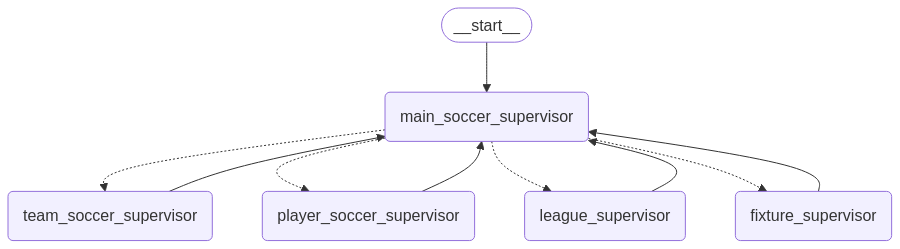

In [5]:
# -------------------------------- League --------------------------------

league_info_agent = create_react_agent(
    model=llm,
    tools=[get_league_info, get_all_leagues_id, get_league_id_by_name],
    name="league_info_agent",
    prompt= LEAGUE_INFO_PROMPT
)

league_schedule_standings_agent = create_react_agent(
    model=llm,
    tools=[get_league_id_by_name, get_all_leagues_id, get_standings, get_league_schedule_by_date],
    name="league_schedule_standings_agent",
    prompt=LEAGUE_SCHEDULE_STANDINGS_PROMPT
)

tavily_search_agent = create_react_agent(
    model=llm,
    tools=[tavily_search_tool],
    name="tavily_search_agent",
    prompt=TAVILY_SEARCH_PROMPT
)


# Create supervisor for games
league_supervisor = create_supervisor(
    [league_info_agent, league_schedule_standings_agent, tavily_search_agent],
    supervisor_name = "league_supervisor",
    model=llm,
    prompt=LEAGUE_SUPERVISOR_PROMPT
).compile(name = "league_supervisor")



# -------------------------------- TEAM --------------------------------

tavily_search_agent = create_react_agent(
    model=llm,
    tools=[tavily_search_tool],
    name="tavily_search_agent",
    prompt=TAVILY_SEARCH_PROMPT
)

live_match_agent = create_react_agent(
    model=llm,
    tools=[get_live_match_for_team, get_live_stats_for_team, get_live_match_timeline],
    name="live_match_agent",
    prompt= LIVE_MATCH_PROMPT
)

team_fixtures_agent = create_react_agent(
    model=llm,
    tools=[get_team_fixtures, get_team_fixtures_by_date_range, get_team_info],
    name="team_fixtures_agent",
    prompt=TEAM_FIXTURES_PROMPT
)

# Create supervisor for games
team_soccer_supervisor = create_supervisor(
    [tavily_search_agent, team_fixtures_agent, live_match_agent],
    supervisor_name = "team_soccer_supervisor",
    model=llm,
    prompt=TEAM_SOCCER_SUPERVISOR_PROMPT
).compile(name = "team_soccer_supervisor")


# -------------------------------- PLAYERS--------------------------------


tavily_search_agent = create_react_agent(
    model=llm,
    tools=[tavily_search_tool],
    name="tavily_search_agent",
    prompt=TAVILY_SEARCH_PROMPT
)

player_id_stats_agent = create_react_agent(
    model=llm,
    tools=[get_player_id, get_player_statistics, get_player_profile],  # add get_league_id_by_name for get_player_statistics_2
    name="player_id_stats_agent",
    prompt=PLAYER_ID_STATS_PROMPT
)


player_soccer_stats_agent_2 = create_react_agent(
    model=llm,
    tools=[get_player_id, get_league_id_by_name, get_player_statistics_2],  # add get_league_id_by_name for get_player_statistics_2
    name="player_soccer_stats_agent_2",
    prompt=PLAYER_SOCCER_STATS_PROMPT_2
)

# Create supervisor for games
player_soccer_supervisor = create_supervisor(
    [tavily_search_agent, player_id_stats_agent, player_soccer_stats_agent_2],
    supervisor_name = "player_soccer_supervisor",
    model=llm,
    prompt=PLAYER_SOCCER_SUPERVISOR_PROMPT
).compile(name = "player_soccer_supervisor")




# -------------------------------- FIXTURES --------------------------------

live_match_agent = create_react_agent(
    model=llm,
    tools=[get_live_match_for_team, get_live_stats_for_team, get_live_match_timeline],
    name="live_match_agent",
    prompt= LIVE_MATCH_PROMPT
)

fixture_schedule_agent = create_react_agent(
    model=llm,
    tools=[get_league_schedule_by_date, get_multiple_fixtures_stats, tavily_search_tool],
    name="fixture_schedule_agent",
    prompt=FIXTURE_SCHEDULE_PROMPT
)

team_fixtures_agent = create_react_agent(
    model=llm,
    tools=[get_team_fixtures, get_team_fixtures_by_date_range, get_team_info],
    name="team_fixtures_agent",
    prompt=TEAM_FIXTURES_PROMPT
)

tavily_search_agent = create_react_agent(
    model=llm,
    tools=[tavily_search_tool],
    name="tavily_search_agent",
    prompt=TAVILY_SEARCH_PROMPT
)

# Create supervisor for games
fixture_supervisor = create_supervisor(
    [live_match_agent, fixture_schedule_agent, team_fixtures_agent, tavily_search_agent],
    supervisor_name = "fixture_supervisor",
    model=llm,
    prompt=FIXTURE_SUPERVISOR_PROMPT
).compile(name = "fixture_supervisor")


# -------------------------------- MAIN SUPERVISOR --------------------------------
main_soccer_supervisor = create_supervisor(
    [league_supervisor, team_soccer_supervisor, player_soccer_supervisor, fixture_supervisor],
    supervisor_name = "main_soccer_supervisor",
    model=llm,
    prompt=SOCCER_SUPERVISOR_PROMPT
).compile(name = "main_soccer_supervisor")

display(
    Image(
        main_soccer_supervisor.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)





In [ ]:


result = main_soccer_supervisor.invoke({
    "messages": [
        {
            "role": "user",
            "content": "Tell me about the performance of Pittsburgh Pirates in the 2024 season"
        }
    ]
})


result

In [9]:
from typing import List, Dict, Any, Optional, Sequence, TypedDict, Annotated
from pydantic import BaseModel, Field, field_validator
from langchain_core.tools import StructuredTool
from nba_api.stats.endpoints import leaguestandingsv3, teamyearbyyearstats, leaguegamefinder
from nba_api.stats.static import teams
from nba_api.stats.library.parameters import SeasonTypeAllStar, SeasonYear, Season, PerModeSimple
import pandas as pd
from datetime import datetime, timedelta
from langchain_core.prompts import PromptTemplate
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import JsonOutputParser
from langchain_openai import ChatOpenAI
# from langgraph.prebuilt import create_function_calling_executor  # Correct import
from langgraph.graph import END, StateGraph
import operator
import asyncio
import nest_asyncio
nest_asyncio.apply()


# --- AgentState Definition ---
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    sub_queries: Optional[List[Dict[str, str]]] = None  # List of dicts: {query, supervisor}
    current_query: Optional[str] = None
    # agent_index: Not needed - we're using supervisor names directly


# --- Supervisor Prompts (from previous response - included for completeness) ---
# (Include the GAME_SUPERVISOR_PROMPT, PLAYER_SUPERVISOR_PROMPT,
#  TEAM_SUPERVISOR_PROMPT, and NBA_SUPERVISOR_PROMPT from a previous response here.)
#  For brevity, I am not putting it again.



async def split_node(state: AgentState) -> Dict[str, List[Dict[str, str]]]:
    """Splits the user's query into sub-queries and assigns supervisors."""

    class SubQuery(BaseModel):
        query: str = Field(..., description="The sub-query text.")
        supervisor: str = Field(..., description="The name of the assigned supervisor agent ('league_supervisor', 'team_soccer_supervisor', 'player_soccer_supervisor', or 'fixture_supervisor').")

    class ParsedOutput(BaseModel):
        sub_queries: List[SubQuery] = Field(..., description="A list of sub-query dictionaries. Each dictionary MUST contain a 'query' key (the sub-query) and a 'supervisor' key (the name of the assigned supervisor). The number of sub-queries should be between 1 and 10, inclusive, based on the complexity of the original query. Simple queries should have fewer sub-queries.")


    llm = ChatOpenAI(model="gpt-4o", temperature=0)  # Or your preferred LLM
    llm_with_structure = llm.with_structured_output(ParsedOutput)

    prompt = PromptTemplate(
        template="""You are an advanced query decomposition and routing assistant for a comprehensive soccer information system. Your task is to analyze a user's query and break it down into a set of smaller, focused sub-queries, assigning each to the most appropriate supervisor agent.

        **Analyze the user's query:** `{query}`.

        **Determine the optimal number of sub-queries:** Break down the query into *1 to 10* sub-queries, depending on the complexity and scope of the original question.
            *   A simple question requiring information from only one area might only need *one* sub-query.
            *   A complex question requiring information from multiple areas, or requiring in-depth analysis, might need *several* sub-queries, *but no more than 10*.  Use your judgment and **prioritize simplicity and directness**.
            *   **Do not generate unnecessary sub-queries.** If the original query can be answered directly by one supervisor, do *not* create additional sub-queries.

        **Supervisor Agents and Their Expertise:**

        1.  **league_supervisor**: This supervisor is the expert on all things related to soccer *leagues*.  It can handle queries about:
            *   **General League Information:** League history, format, participating teams, rules, and regulations.
            *   **League Standings:**  Detailed standings for specific seasons, including various statistical breakdowns.
            *   **League Schedules:**  Retrieving schedules for entire leagues across specific date ranges.
            * **League IDs:** Can be used to retrieve league IDs

        2.  **team_soccer_supervisor**: This supervisor is the expert on all things related to soccer *teams*. It can handle queries about:
            *   **Team Fixtures:**  Past and upcoming match schedules for a specific team.
            *   **Live Match Information:** Real-time scores, statistics, and event timelines for matches *currently in progress*.
            *   **General Team Information:**  Team history, roster, stadium, and other non-match-specific details.
            *   **Team Performance Analysis:** Trends in wins/losses, goal-scoring, etc.

        3.  **player_soccer_supervisor**: This supervisor is the expert on all things related to individual soccer *players*. It can handle queries about:
            *   **Player Profiles:** Biographical information, career history, team affiliations.
            *   **Player Statistics:** Detailed statistics, filterable by season and/or league.
            *   **Player ID:** Can be used to retrieve Player IDs
            *   **Player Comparisons:**  Comparing statistics and performance of multiple players.
            *   **Player Performance Analysis:** Trends in a player's performance over time.

        4.  **fixture_supervisor**: This supervisor is the expert on *specific soccer matches (fixtures)* and *league schedules*. It can handle queries about:
            *   **Fixture Schedules:** Retrieving schedules for specific leagues and dates.
            * **Fixture Stats** Retrieving Fixture Stats
            *   **Fixture IDs:**  Finding the unique IDs for specific matches.
            *   **Detailed Fixture Statistics:** In-depth statistics for individual matches (shots, possession, passing accuracy, fouls, cards, etc.).
            *   **Fixture Analysis:** Comparing team performance within a specific match.

        **Output Format:**

        Return a JSON object with a single key, 'sub_queries'. The value is a list of dictionaries. Each dictionary MUST have the following keys:

        *   `query`: The sub-query text (string).
        *   `supervisor`: The name of the supervisor agent that should handle this sub-query (string). Must be one of: "league_supervisor", "team_soccer_supervisor", "player_soccer_supervisor", or "fixture_supervisor".

        **Key Principles:**

        *   **Directness:** Sub-queries should be as direct and to-the-point as possible.  They should be phrased as questions that the assigned supervisor can directly answer.
        *   **Specificity:** Each sub-query must be clearly answerable by *one* of the supervisors. Avoid ambiguity.
        *   **Independence:** Sub-queries should be as independent of each other as possible.
        *   **Simplicity:** Favor fewer sub-queries when possible. Avoid unnecessary decomposition.
        * **One Supervisor per Sub-query:** Each sub-query should map to only *one* supervisor.

       **EXAMPLES:**

        **Example 1 (Simple - Single Supervisor):**
        User Query: "What's the score of the Liverpool game?"
        Output: `{{"sub_queries": [{{"query": "What's the score of the Liverpool game right now?", "supervisor": "team_soccer_supervisor"}}]}}`

        **Example 2 (Advanced - Mixed Supervisors - Live and Historical Data):**
        User Query: "Is Lionel Messi playing tonight? If so, what are his career goals in Champions League?"
        Output: `{{"sub_queries": [{{"query": "Is Lionel Messi's team playing in a live match tonight?", "supervisor": "team_soccer_supervisor"}}, {{"query": "What are Lionel Messi's career goals in the Champions League?", "supervisor": "player_soccer_supervisor"}}]}}`

        **Example 3 (Advanced - Multiple Supervisors):**
        User Query: "Compare the average goals scored per game for Real Madrid and Barcelona over the last three seasons."
        Output: `{{"sub_queries": [{{"query": "What were Real Madrid's average goals scored per game for the last three seasons?", "supervisor": "team_soccer_supervisor"}}, {{"query": "What were Barcelona's average goals scored per game for the last three seasons?", "supervisor": "team_soccer_supervisor"}}]}}`

        **Example 4 (Complex - League and Player Statistics):**
        User Query: "Which team in the Premier League has the most players with over 10 goals this season, and list those players with their goal counts?"
        Output: `{{"sub_queries": [
            {{"query": "Which teams are in the Premier League?", "supervisor": "league_supervisor"}},
            {{"query": "For each team in the Premier League, which players have over 10 goals this season?", "supervisor": "player_soccer_supervisor"}},
            {{"query": "Combine the results from the previous sub-queries to determine which Premier League team has the most players with over 10 goals.", "supervisor": "league_supervisor"}}
        ]}}`

        **Example 5 (Complex - Fixture Difficulty and Team Form):**
        User Query: "Analyze Arsenal's next 5 fixtures.  Assess the difficulty of each match based on the opponent's current league standing and recent form (last 5 matches).  Also, provide Arsenal's current form (last 5 matches)."
        Output: `{{"sub_queries": [
            {{"query": "What are Arsenal's next 5 fixtures?", "supervisor": "team_soccer_supervisor"}},
            {{"query": "What is the current league standing of [opponent 1 from Arsenal's fixtures, opponent 2, etc.]?", "supervisor": "league_supervisor"}},
            {{"query": "What are the last 5 match results for [opponent 1 from Arsenal's fixtures, opponent 2, etc.]?", "supervisor": "team_soccer_supervisor"}},
            {{"query": "What are Arsenal's last 5 match results?", "supervisor": "team_soccer_supervisor"}}
        ]}}`
        
        **Example 6 (Complex - Multi-faceted Team Comparison):**
        User Query: "Analyze the upcoming match between Manchester United and Chelsea.  Compare their last 5 head-to-head results, their current league standings, their top scorers' form in the last 3 matches, and any relevant news that might impact the game."
        Output: `{{"sub_queries": [
            {{"query": "What are the last 5 head-to-head results between Manchester United and Chelsea?", "supervisor": "team_soccer_supervisor"}},
            {{"query": "What are the current league standings for Manchester United and Chelsea?", "supervisor": "league_supervisor"}},
            {{"query": "Who are the top scorers for Manchester United and Chelsea?", "supervisor": "team_soccer_supervisor"}},
            {{"query": "What are the top scorer for Manchester United's stats in their last 3 matches?", "supervisor": "player_soccer_supervisor"}},
            {{"query": "What are the top scorer for Chelsea's stats in their last 3 matches?", "supervisor": "player_soccer_supervisor"}},
            {{"query": "What is the latest news regarding the upcoming Manchester United vs. Chelsea match, including injuries, suspensions, and tactical previews?", "supervisor": "team_soccer_supervisor"}}
        ]}}`

        **Example 7 (Complex - Player Performance and Fixture Analysis):**
        User Query: "Compare Lionel Messi and Cristiano Ronaldo's performance in their last 5 matches in any competition. Include goals, assists, shots on target, and key passes. Also, analyze the difficulty of their opponents based on league standings."
        Output: `{{"sub_queries": [
            {{"query": "What are Lionel Messi's last 5 matches?", "supervisor": "player_soccer_supervisor"}},
            {{"query": "What are Cristiano Ronaldo's last 5 matches?", "supervisor": "player_soccer_supervisor"}},
            {{"query": "Get goals, assists, shots on target, and key passes for Lionel Messi in [match IDs from first sub-query, separated by commas].", "supervisor": "player_soccer_supervisor"}},
            {{"query": "Get goals, assists, shots on target, and key passes for Cristiano Ronaldo in [match IDs from second sub-query, separated by commas].", "supervisor": "player_soccer_supervisor"}},
            {{"query": "What is the current league standing of [opponent 1 from Messi's matches, opponent 2, etc.]?", "supervisor": "league_supervisor"}},
            {{"query": "What is the current league standing of [opponent 1 from Ronaldo's matches, opponent 2, etc.]?", "supervisor": "league_supervisor"}}
        ]}}`
        
        """,
        input_variables=["query"]
    )

    chain = prompt | llm_with_structure
    query = state["messages"][-1].content
    structured_output = await chain.ainvoke({"query": query})
    return {"sub_queries": [sub_query.dict() for sub_query in structured_output.sub_queries]}   # Convert to dict


async def run_supervisor(state: AgentState, supervisor_dict: Dict[str, Any]) -> AgentState:
    """Runs the appropriate supervisor based on the assigned supervisor name."""
    sub_query_info = state['current_query']
    sub_query = sub_query_info['query']
    supervisor_name = sub_query_info['supervisor']
    current_date = datetime.now().isoformat()

    # --- CRITICAL CHANGE:  Look up the supervisor by NAME ---
    supervisor = supervisor_dict[supervisor_name]

    supervisor_input = {
        "messages": state["messages"][:1] + [HumanMessage(content=f"{sub_query} Today is: {current_date}")],
    }
    response = await supervisor.ainvoke(supervisor_input)
    return {"messages": [response['messages'][-1]]}


async def parallel_runner(state: AgentState, supervisor_dict: Dict[str, Any]) -> Dict[str, List[BaseMessage]]:
    """Runs the appropriate supervisors in parallel for each sub-query."""
    tasks = []
    for sub_query_info in state["sub_queries"]:
        print(f'Running sub-query: {sub_query_info["query"]}: {sub_query_info["supervisor"]}')
        # Pass the entire dictionary containing query AND supervisor
        updated_state = {**state, "current_query": sub_query_info}
        task = asyncio.create_task(run_supervisor(updated_state, supervisor_dict))
        tasks.append(task)

    results = await asyncio.gather(*tasks)
    all_messages = []
    for result in results:
        all_messages.extend(result["messages"])
    return {"messages": all_messages}



async def combine_results(state: AgentState) -> Dict[str, List[BaseMessage]]:
    """Combines results and presents to LLM for final answer."""
    final_results = [msg.content for msg in state["messages"][1:]]
    combined_results_str = "\n\n".join(final_results)

    final_llm = ChatOpenAI(model="gpt-4o", temperature=0)
    final_prompt = PromptTemplate(
        template="""You are an expert NBA assistant.

        Original query: {original_query}

        Sub-query results: {combined_results}

        Provide a comprehensive answer.
        """,
        input_variables=["original_query", "combined_results"]
    )
    final_chain = final_prompt | final_llm
    final_answer = await final_chain.ainvoke({"original_query": state["messages"][0].content, "combined_results": combined_results_str})

    new_messages = [state["messages"][0], HumanMessage(content=final_answer.content)]
    return {"messages": new_messages}


# --- Main Entrypoint and Workflow Compilation ---

async def main(query: str, supervisor_dict: Dict[str, Any]) -> Dict: # Changed to dict
    """Main entry point."""
    initial_state = {"messages": [HumanMessage(content=query)]}

    workflow = StateGraph(AgentState)
    workflow.add_node("split_query", split_node)
    workflow.add_node("parallel_supervisors", lambda state, supervisors=supervisor_dict: asyncio.run(parallel_runner(state, supervisors))) # Changed to dict
    workflow.add_node("combine_results", combine_results)

    workflow.add_edge(START, "split_query")
    workflow.add_edge("split_query", "parallel_supervisors")
    workflow.add_edge("parallel_supervisors", "combine_results")
    workflow.add_edge("combine_results", END)

    app = workflow.compile()
    final_state = await app.ainvoke(initial_state)
    return final_state


# --- Example Usage (and Setup) ---

if __name__ == "__main__":
    async def run_example():
        llm = ChatOpenAI(model="gpt-4o") # Define llm
        # --- CRITICAL: Create a DICTIONARY of supervisors ---
        supervisor_dict = {
            "league_supervisor": league_supervisor,
            "team_soccer_supervisor": team_soccer_supervisor,
            "player_soccer_supervisor": player_soccer_supervisor,
            "fixture_supervisor": fixture_supervisor,
        }


        user_query = "What are the upcoming fixtures for the Champions League, which teams are leading the chart and who are the top players?"
        # user_query = "What are the games happening today?. Show me Central time"
        final_result = await main(user_query, supervisor_dict)  # Pass the DICT
        print("----FINAL RESULT----")
        print(final_result['messages'][-1].content)

    asyncio.run(run_example())

Running sub-query: What are the upcoming fixtures for the Champions League?: fixture_supervisor
Running sub-query: Which teams are leading the Champions League standings?: league_supervisor
Running sub-query: Who are the top players in the Champions League based on current season performance?: player_soccer_supervisor
----FINAL RESULT----
Certainly! Here's a comprehensive overview of the current UEFA Champions League 2024/2025 season, including upcoming fixtures, leading teams, and top players:

### Upcoming Fixtures
For the dates of March 11-13, 2025, the following matches are scheduled:

- **March 11, 2025:**
  - **Barcelona vs. Benfica**: Barcelona is leading 1-0 on aggregate.
  - **Bayern Munich vs. Opponent**: Bayern Munich holds a strong 3-0 lead on aggregate.
  - **Internazionale vs. Liverpool**: Liverpool is ahead with a 1-0 aggregate lead.

- **March 12, 2025:**
  - **Arsenal**: Arsenal is significantly ahead in their tie, indicating a strong position to advance.
  - **Aston V